In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

In [2]:
N = int(1e7)
x_1 = np.random.rand(N)
x_2 = np.random.rand(N)
y = np.sqrt(x_1 * x_2 + np.abs(2 * x_1 - x_2))

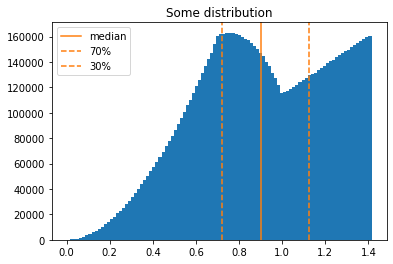

In [3]:
plt.hist(y, bins=100)
plt.axvline(np.median(y), label='median', color='C1')
plt.axvline(np.percentile(y, 70), linestyle='--', label='70%', color='C1')
plt.axvline(np.percentile(y, 30), linestyle='--', label='30%', color='C1')
plt.title("Some distribution")
plt.legend()
plt.show()

In [12]:
n_groups = 10
y_median = np.median(y)
y_std = np.std(y)
factor = np.sqrt(np.pi / 2)

median_metrics = []
for n in tqdm(range(n_groups, 5000)):
    grouped_y = []
    grouped_y = [np.random.choice(y, n) for i in range(n_groups)]
    medians = [np.median(y_i) for y_i in grouped_y]
    median = np.median(medians) - y_median
    sigma = np.std(medians)
    sigma_calc = factor * y_std / np.sqrt(n)
    el = {'n': n, 
          'median_error': median, 
         f'std_{n_groups}_groups': sigma,
          'std_calculated': sigma_calc}
    median_metrics.append(el)
data = pd.DataFrame(median_metrics).set_index('n')

100%|██████████| 4990/4990 [00:10<00:00, 479.66it/s]


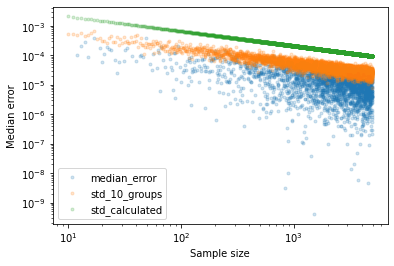

In [19]:
data.plot(style='.', alpha=0.2)
plt.ylabel('Median error')
plt.xlabel('Sample size')
plt.yscale('log')
plt.xscale('log')
plt.show()

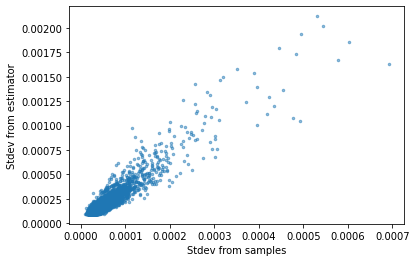

In [25]:
t = data.index
x = data[f'std_{n_groups}_groups']
y = data['std_calculated']
plt.plot(x, y, '.', markersize=5, alpha=0.5)
plt.ylabel('Stdev from estimator')
plt.xlabel("Stdev from samples")
plt.show()

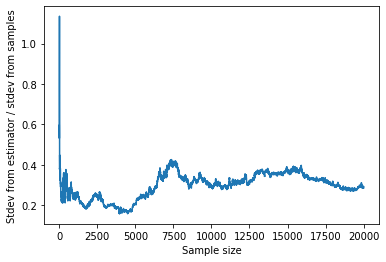

In [7]:
plt.plot(t, y / x)
plt.ylabel('Stdev from estimator / stdev from samples')
plt.xlabel('Sample size')
plt.show()